<a href="https://colab.research.google.com/github/jjdub82/...../blob/master/Stock_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1:  Gross Profit/Revenu =  profit margin
2:  SG&A
3:  R&D
4:  Depreciation
5:  Interest

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 38.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=10337d6b40a6b42c723a144bffb3ab2bf65e54caef4ffd606a4310a26e30ecff
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline




In [3]:
ticker = yf.Ticker(input("Enter Ticker\n"))

Enter Ticker
AMD


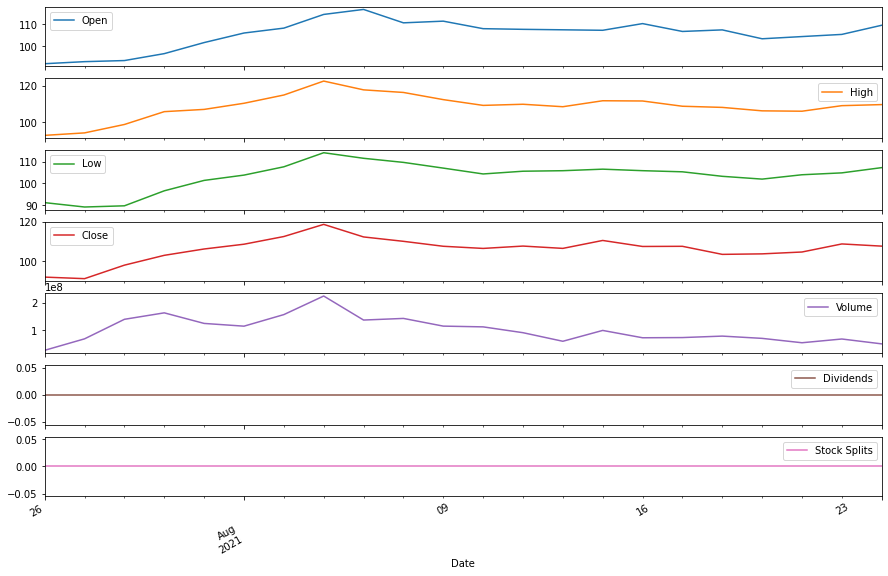

In [4]:
ticker_hist = ticker.history()
ticker_hist.plot(kind = 'line',figsize = (15,10), subplots=True);

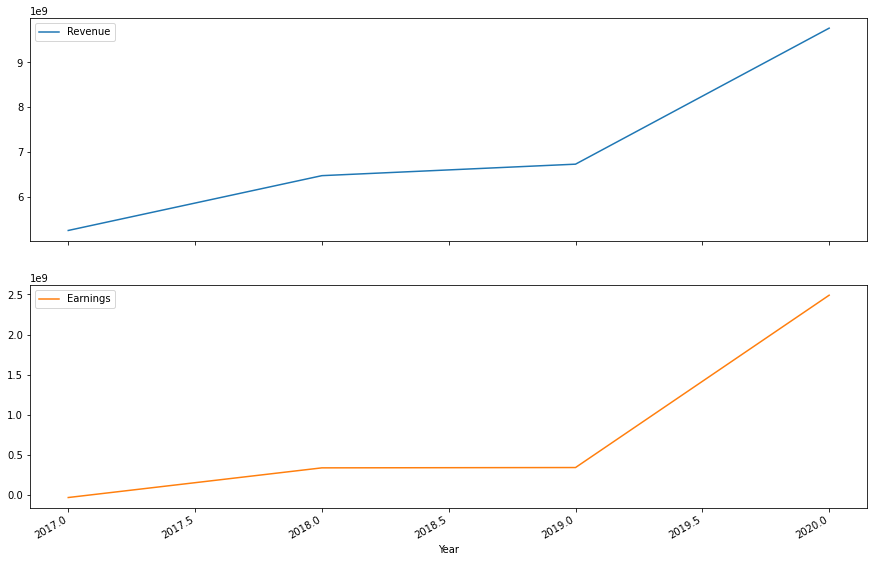

In [5]:
ticker.earnings.plot(kind = 'line', figsize =(15,10), subplots=True);

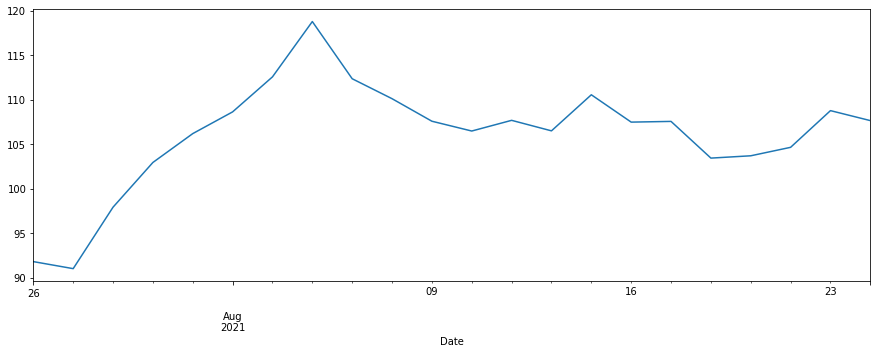

In [6]:
closing_prices =ticker_hist['Close']
closing_prices.plot(kind = 'line', figsize = (15,5))

In [7]:
ticker.recommendations.tail(20)

,Firm,To Grade,From Grade,Action
Date,,,,
2020-10-28 16:27:01,Craig-Hallum,Buy,Hold,up
2020-10-28 16:44:01,Citigroup,Sell,,main
2020-11-04 11:55:32,Goldman Sachs,Buy,Neutral,up
2020-11-06 10:55:46,Wells Fargo,Overweight,Equal-Weight,up
2021-01-14 11:10:50,BMO Capital,Underperform,Market Perform,down
2021-01-14 17:48:17,Cowen & Co.,Outperform,,main
2021-01-25 16:11:48,RBC Capital,Outperform,,main
2021-01-27 13:13:16,Rosenblatt,Buy,,main
2021-01-27 17:53:40,JP Morgan,Neutral,,main


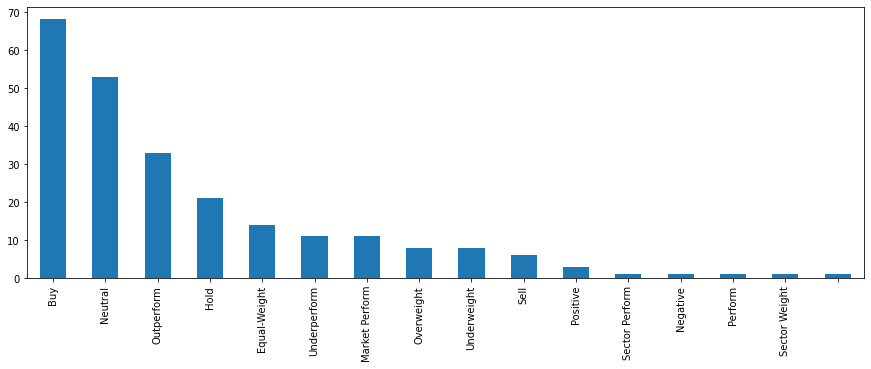

In [8]:
ticker.recommendations['To Grade'].value_counts().plot(kind = 'bar', figsize=(15,5))

In [9]:
ticker.info['grossMargins']

0.45712003

In [10]:
gross_margin = ticker.info['grossMargins']
market_cap = ticker.info['marketCap']
shares_outstanding = ticker.info['sharesOutstanding']

In [11]:
finance = ticker.financials

FINANCE STATEMENT DATAFRAMES

In [12]:
finance = finance.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')

In [13]:
finance.index.name = 'Category'
finance

,2020,2019,2018,2017
Category,,,,
Research Development,1.983e+09,1.547e+09,1.434e+09,1.196e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.28e+09,3.72e+08,3.28e+08,-1.5e+07
Minority Interest,None,None,None,None
Net Income,2.49e+09,3.41e+08,3.37e+08,-3.3e+07
Selling General Administrative,9.95e+08,7.5e+08,5.62e+08,5.16e+08
Gross Profit,4.347e+09,2.868e+09,2.447e+09,1.787e+09
Ebit,1.369e+09,6.31e+08,4.51e+08,1.27e+08
Operating Income,1.369e+09,6.31e+08,4.51e+08,1.27e+08


In [14]:
sga_list = list(finance.loc['Selling General Administrative'])
ebit_list = list(finance.loc['Ebit'])
income_tax_list = list(finance.loc['Income Tax Expense'])
interest_list = list(finance.loc['Interest Expense'])

In [15]:
bal_sheet = ticker.balancesheet
bal_sheet = bal_sheet.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
bal_sheet.index.name = 'Category'

cashflow = ticker.cashflow
cashflow = cashflow.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
cashflow.index.name = 'Category'


In [16]:
operating_margins = ticker.info['operatingMargins']

In [17]:
operating_cashflow = ticker.info['operatingCashflow']

In [18]:
df_fin = finance.loc[['Operating Income','Net Income','Research Development','Cost Of Revenue', 'Total Revenue', 'Total Operating Expenses', 'Gross Profit']]

In [19]:
df_fin

,2020,2019,2018,2017
Category,,,,
Operating Income,1.369e+09,6.31e+08,4.51e+08,1.27e+08
Net Income,2.49e+09,3.41e+08,3.37e+08,-3.3e+07
Research Development,1.983e+09,1.547e+09,1.434e+09,1.196e+09
Cost Of Revenue,5.416e+09,3.863e+09,4.028e+09,3.466e+09
Total Revenue,9.763e+09,6.731e+09,6.475e+09,5.253e+09
Total Operating Expenses,8.394e+09,6.1e+09,6.024e+09,5.126e+09
Gross Profit,4.347e+09,2.868e+09,2.447e+09,1.787e+09


In [20]:
operating_income_list = list(df_fin.loc['Operating Income'])
net_income_list = list(df_fin.loc['Net Income'])
research_list = list(df_fin.loc['Research Development'])
cost_of_revenue = list(df_fin.loc['Cost Of Revenue'])
total_revenue_list = list(df_fin.loc['Total Revenue'])
total_Operating_expense_list = list(df_fin.loc['Total Operating Expenses'])
gross_profit_list = list(df_fin.loc['Gross Profit'])

In [21]:
growth_rate = (total_revenue_list[0]-total_revenue_list[1])/total_revenue_list[1]
print(growth_rate)

0.45045312732134896


In [22]:
cashflow

,2020,2019,2018,2017
Category,,,,
Investments,-6.580000e+08,41000000.0,-78000000.0,-78000000.0
Change To Liabilities,-5.130000e+08,153000000.0,212000000.0,-8000000.0
Total Cashflows From Investing Activities,-9.520000e+08,-149000000.0,-170000000.0,-54000000.0
Total Cash From Financing Activities,6.000000e+06,43000000.0,28000000.0,-33000000.0
Change To Operating Activities,2.180000e+08,65000000.0,18000000.0,-130000000.0
Issuance Of Stock,8.500000e+07,523000000.0,70000000.0,20000000.0
Net Income,2.490000e+09,341000000.0,337000000.0,-33000000.0
Change In Cash,1.250000e+08,387000000.0,-108000000.0,-75000000.0
Repurchase Of Stock,-7.800000e+07,-6000000.0,-6000000.0,-6000000.0


In [23]:
capX_list = list(cashflow.loc['Capital Expenditures'])
depreciation_list = list(cashflow.loc['Depreciation'])

In [24]:
df_cash = cashflow.loc[['Depreciation', 'Net Income']]

In [25]:
df_bal = bal_sheet.loc[['Cash', 'Inventory']]

In [26]:
cash_list = list(bal_sheet.loc['Cash'])
cash_list

[1595000000.0, 1466000000.0, 1078000000.0, 1185000000.0]

In [27]:
research_list

[1983000000.0, 1547000000.0, 1434000000.0, 1196000000.0]

In [28]:
gross_margins_list = [gross_profit_list[0] /  total_revenue_list[0], gross_profit_list[1] /  total_revenue_list[1], gross_profit_list[2] /  total_revenue_list[2], gross_profit_list[3] /  total_revenue_list[3]]
print(gross_margins_list)

[0.44525248386766364, 0.4260882484029119, 0.3779150579150579, 0.3401865600609176]


In [29]:
SGA_Ratio = [sga_list[0]/ gross_profit_list[0], sga_list[1]/ gross_profit_list[1], sga_list[2]/ gross_profit_list[2], sga_list[3]/ gross_profit_list[3]]
print(SGA_Ratio)

[0.22889348976305499, 0.2615062761506276, 0.2296689824274622, 0.28875209848908784]


In [30]:
research_ratio = [research_list[0] / gross_profit_list[0],research_list[1] / gross_profit_list[1],research_list[2] / gross_profit_list[2],research_list[3] / gross_profit_list[3]]
print(research_ratio)

[0.4561766735679779, 0.5394002789400278, 0.5860237024928484, 0.6692781197537773]


In [31]:
depreciation_ratio = [depreciation_list[0] / gross_profit_list [0], depreciation_list[1] / gross_profit_list [1], depreciation_list[2] / gross_profit_list [2], depreciation_list[3] / gross_profit_list [3]]
print(depreciation_ratio)

[0.08143547273982056, 0.0899581589958159, 0.06947282386595832, 0.08058198097369894]


In [32]:
interest_ratio = [interest_list[0] / gross_profit_list[0], interest_list[1] / gross_profit_list[1], interest_list[2] / gross_profit_list[2], interest_list[3] / gross_profit_list[3]]
print(interest_ratio)

[-0.01081205429031516, -0.03277545327754533, -0.04944830404577033, -0.07050923335198657]


In [33]:
operating_cashflow_list = list(cashflow.loc['Total Cash From Operating Activities'])
free_cashflow_list = [operating_cashflow_list[0] + capX_list[0], operating_cashflow_list[1] + capX_list[1], operating_cashflow_list[2] + capX_list[2], operating_cashflow_list[3] + capX_list[3]]
print(free_cashflow_list)

[777000000.0, 276000000.0, -129000000.0, -101000000.0]


In [34]:
#ttm_cash = float(free_cash_flow_manual[0])
last_year_cash = float(free_cashflow_list[0])
two_year_cash = float(free_cashflow_list[1])
three_year_cash = float(free_cashflow_list[2])
four_year_cash = float(free_cashflow_list[3])


In [38]:
cashflow_growth_rate = [(last_year_cash- two_year_cash)/ two_year_cash, (two_year_cash - three_year_cash)/ three_year_cash, (three_year_cash - four_year_cash)/ four_year_cash]
print(cashflow_growth_rate)

[1.815217391304348, -3.13953488372093, 0.27722772277227725]


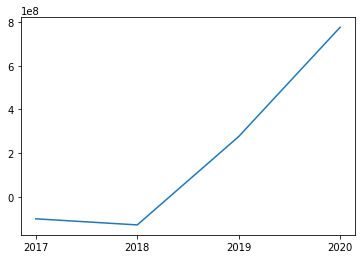

In [39]:
cashflow_dict = {'index':[0,1,2,3], 'period': ['2020', '2019', '2018', '2017'], 'cashflow':[last_year_cash,two_year_cash,three_year_cash,four_year_cash]}
    
   # 'ttm': ttm_cash, '2020': last_year_cash, '2019': two_year_cash, '2018': three_year_cash, '2017': four_year_cash}
cashflow_dataframe = pd.DataFrame.from_dict(cashflow_dict)
cashflow_dataframe = cashflow_dataframe.sort_values(by= 'index', ascending=False)
plt.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow)

In [40]:
dividend = ticker.info['dividendRate']
print(dividend)

None


In [41]:
pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=e96043773c631f5d502608a0e813ad7dd6d2e733a3ade3be301fa203afa271dc
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [42]:
from fpdf import FPDF

In [43]:
earnings_df = ticker.earnings
earnings_list = list(ticker.earnings['Earnings'])
print(earnings_list)
eps_est_list = [earnings_list[0] / shares_outstanding, earnings_list[1] / shares_outstanding, earnings_list[2] / shares_outstanding]
print(eps_est_list)

[-33000000, 337000000, 341000000, 2490000000]
[-0.027205949393056046, 0.27783045289272384, 0.2811281437282458]


In [44]:
total_assets_list = list(bal_sheet.loc['Total Assets'])
liability_list = list(bal_sheet.loc['Total Liab'])
Shareholdr_equity_list = [total_assets_list[0]-liability_list[0], total_assets_list[1]-liability_list[1], total_assets_list[2]-liability_list[2], total_assets_list[3]-liability_list[3]]

print(total_assets_list)
print(liability_list)
print(Shareholdr_equity_list)

[8962000000.0, 6028000000.0, 4556000000.0, 3552000000.0]
[3125000000.0, 3201000000.0, 3290000000.0, 2956000000.0]
[5837000000.0, 2827000000.0, 1266000000.0, 596000000.0]
